In [ ]:
from IPython.core.display import display, HTML
from pyspark.sql import functions as F
from research_common.spark import create_yarn_spark_session

spark = create_yarn_spark_session('imaging')


In [3]:
i = spark.read.format("avro").load("hdfs://analytics-hadoop/user/fab/commons_images_2022-05/files/job_id=job_0").cache()
i

DataFrame[page_id: bigint, page_namespace: int, page_title: string, page_redirect_title: string, page_restrictions: array<string>, user_id: bigint, user_text: string, revision_id: bigint, revision_parent_id: bigint, revision_timestamp: string, revision_minor_edit: boolean, revision_comment: string, revision_text_bytes: bigint, revision_text_sha1: string, revision_text: string, revision_content_model: string, revision_content_format: string, snapshot: string, wiki_db: string, file_name: string, project: string, file_bytes_b64: string]

In [6]:
i.count()

967052


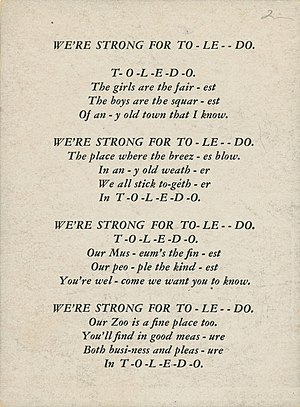
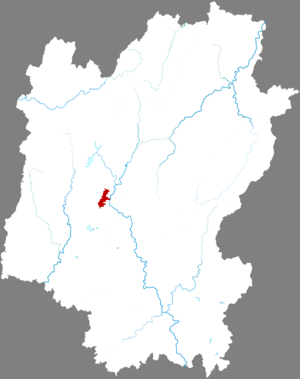

In [5]:
@F.udf(returnType='string')
def html_image(img_b64):
    return '<img src="data:image/png;base64,{0:s}">'.format(img_b64)

html = (i
    .limit(5)
    .withColumn("thumbnail", html_image(F.col("file_bytes_b64")))
    .select("page_title", "thumbnail")
    .toPandas()
    .to_html(escape=False)
)

display(HTML(html))
